In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [329]:
arr=np.array(([34,22.5], [21,30], [15,30])) # Poor in both subjects
arr=np.append(arr,(([92,88.5], [95,93])), axis=0) # Excellant in both subjects
arr=np.append(arr,(([32,72],[20,75],[33,65], [27,80])), axis=0) # Poor in first subject, Good in second subject
arr=np.append(arr,(([65,20], [65,33], [82, 23], [72,32])), axis=0) # Good in first subject, Poor in second subject
arr=np.append(arr,(([48,48],[45,68],[70,45], [48,70],[50,45],[42,60],[62,60],[50,60],[55,72],[57,65],[60,51],[55, 50], [65,55],[62,41] ,[45,50],[70,60],[65,70])), axis=0) ## Average Students

In [330]:
arr.shape

(30, 2)

In [331]:
pd_arr=pd.DataFrame(arr)
pd_arr.columns=['x','y']

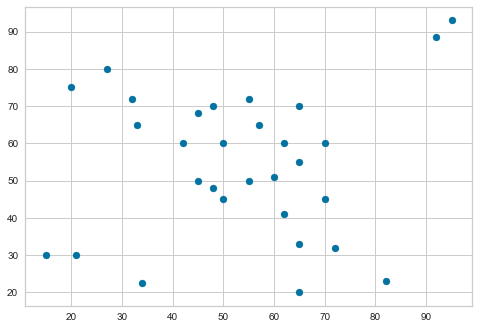

In [332]:
#plt.plot(pd_arr)

plt.scatter(pd_arr['x'], pd_arr['y'])

In [333]:
from sklearn.cluster import KMeans, AgglomerativeClustering, DBSCAN, Birch

C:\Users\smita.ezhava\anaconda3\lib\site-packages\yellowbrick\utils\kneed.py:155: YellowbrickWarning: No 'knee' or 'elbow point' detected This could be due to bad clustering, no actual clusters being formed etc.
  warnings.warn(warning_message, YellowbrickWarning)
C:\Users\smita.ezhava\anaconda3\lib\site-packages\yellowbrick\cluster\elbow.py:343: YellowbrickWarning: No 'knee' or 'elbow' point detected, pass `locate_elbow=False` to remove the warning
  warnings.warn(warning_message, YellowbrickWarning)


<AxesSubplot:title={'center':'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

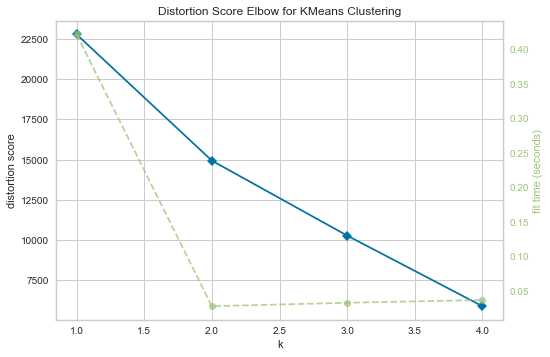

In [334]:
from yellowbrick.cluster import KElbowVisualizer
visual=KElbowVisualizer(KMeans(),k=(1,5))
visual.fit(pd_arr)
visual.show(outpath='elbowplot2.png') 

In [335]:
from scipy.spatial.distance import cdist
clusters=range(1,8)
meanDistortions=[]

for k in clusters:
    model=KMeans(n_clusters=k)
    model.fit(pd_arr)
    prediction=model.predict(pd_arr)
    print(prediction)
    meanDistortions.append(model.inertia_)#(sum(np.min(cdist(tech_sup,model.cluster_centers_))))

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
[0 0 0 1 1 1 1 1 1 0 0 0 0 0 1 0 1 0 1 1 1 1 1 0 0 1 0 0 1 1]
[0 0 0 1 1 2 2 2 2 0 0 0 0 0 2 0 2 0 2 2 2 2 2 0 0 0 0 0 2 2]
[0 0 0 1 1 3 3 3 3 2 2 2 2 2 3 2 3 2 3 2 3 3 3 2 2 2 2 3 2 3]
[4 4 4 2 2 0 0 0 0 1 1 1 1 3 3 1 3 3 3 3 3 3 3 3 3 3 1 3 3 3]
[3 3 3 0 0 4 4 4 4 5 5 5 5 2 1 2 1 2 1 2 1 1 1 2 2 2 2 2 2 1]
[3 3 3 2 2 4 4 4 4 6 6 6 6 0 1 5 1 0 0 1 1 1 1 5 0 5 5 0 5 1]


Text(0.5, 1.0, 'K with Elbow')

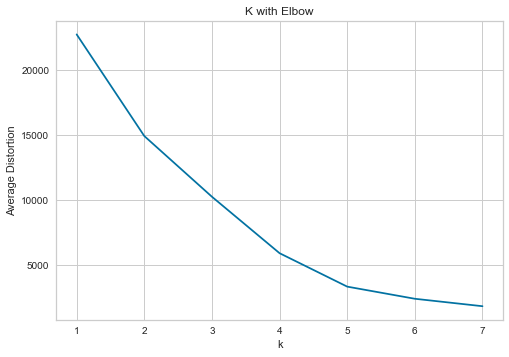

In [336]:
plt.plot(clusters, meanDistortions, 'bx-')
plt.xlabel('k')
plt.ylabel('Average Distortion')
plt.title('K with Elbow')

In [339]:
model=KMeans(n_clusters=5)
model.fit(pd_arr)
prediction=model.predict(pd_arr)

In [340]:
prediction

array([1, 1, 1, 0, 0, 2, 2, 2, 2, 3, 3, 3, 3, 4, 4, 3, 4, 4, 4, 4, 4, 4,
       4, 4, 4, 4, 3, 4, 4, 4])

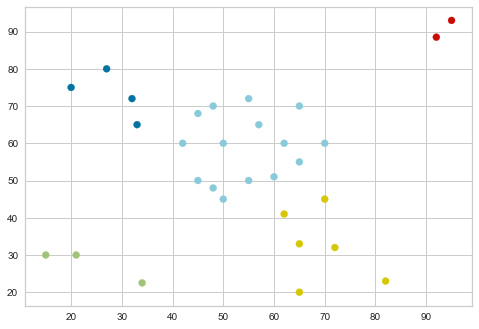

In [342]:
colormap = np.array(['r','g','b','y','c'])
plt.scatter(pd_arr['x'], pd_arr['y'],c=colormap[prediction])

In [403]:
model_scan=DBSCAN(eps=13).fit(pd_arr)

In [404]:
model_scan.labels_

array([-1, -1, -1, -1, -1, -1, -1,  0, -1,  0,  0, -1,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0], dtype=int64)

Text(0, 0.5, 'Subject2')

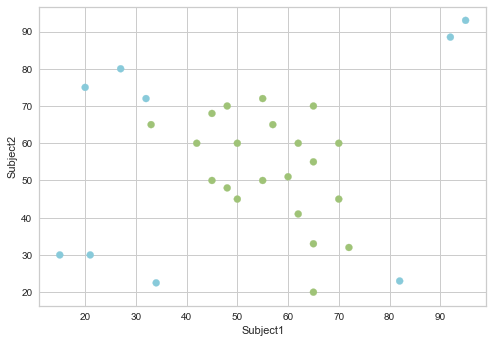

In [405]:
colormap = np.array(['g', 'r','b','y','c'])
plt.scatter(pd_arr['x'], pd_arr['y'],c=colormap[model_scan.labels_])
plt.xlabel('Subject1')
plt.ylabel('Subject2')

# Kgraph for DBScan

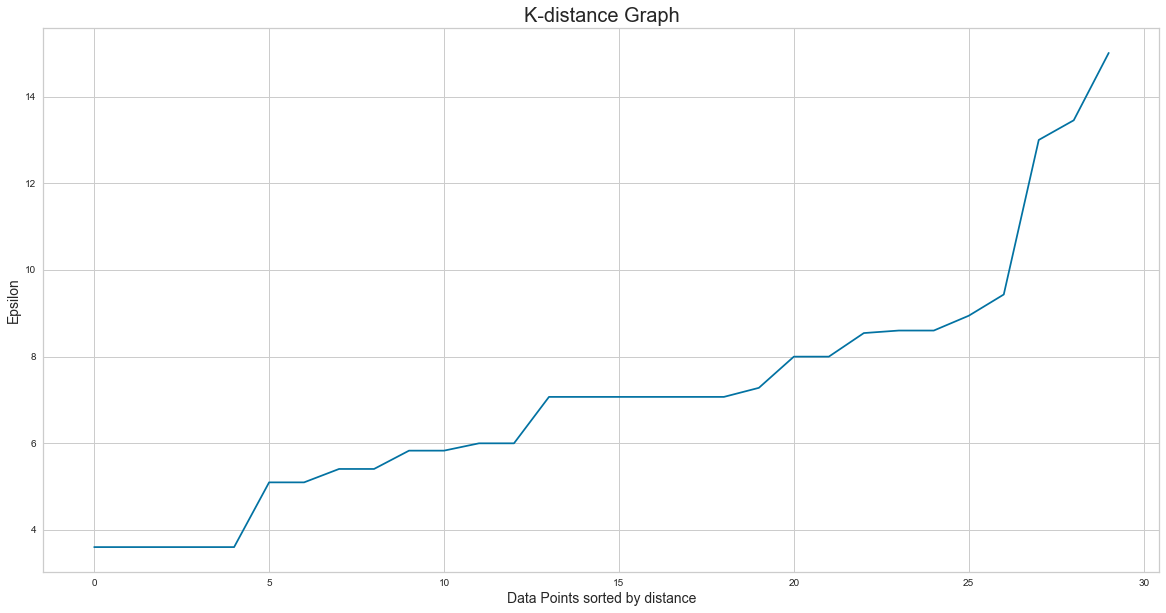

In [393]:
from sklearn.neighbors import NearestNeighbors
neigh = NearestNeighbors(radius=50)
nbrs=neigh.fit(pd_arr)
distances, indices = nbrs.kneighbors(pd_arr)
# Plotting K-distance Graph
distances = np.sort(distances, axis=0)
distances = distances[:,1]
plt.figure(figsize=(20,10))
plt.plot(distances)
plt.title('K-distance Graph',fontsize=20)
plt.xlabel('Data Points sorted by distance',fontsize=14)
plt.ylabel('Epsilon',fontsize=14)
plt.show()